Grover's Search (or **Grover's Algorithm**) is a **quantum algorithm** designed for searching an **unsorted database** or solving an **unstructured search problem** faster than any classical algorithm.

---

### 💡 Key Idea:

If you have $N$ items and **one of them** is the "correct" or "target" item, Grover's algorithm can find it in about $\sqrt{N}$ steps. In contrast, a classical algorithm would require about $N/2$ steps on average.

---

### 🧠 How It Works (Conceptually):

1. **Initialize a superposition** of all $N$ possible states (i.e., all potential solutions).
2. Use a **quantum oracle** to mark the correct solution (by flipping its sign).
3. Apply a **diffusion operator** (also called Grover's diffusion operator) to amplify the probability of the marked item.
4. Repeat steps 2–3 about $\sqrt{N}$ times.
5. **Measure** the system; you'll get the correct item with high probability.

---

### ⚙️ Technical Summary:

* **Problem**: Find $x$ such that $f(x) = 1$, where $f$ is a black-box (oracle) function.
* **Input space**: $\{0, 1\}^n$, so $N = 2^n$.
* **Complexity**:

  * **Quantum**: $O(\sqrt{N})$
  * **Classical**: $O(N)$

---

### 🔍 Example Use Case:

Suppose you're searching a list of 1,000,000 phone numbers for one specific number. Classically, you'd check on average 500,000 entries. Grover's algorithm would only need about 1,000 quantum queries.



it to leverages the oracle jus like deutsch-jozsa and bernard-berstein algorithms.

but the diffreence is that it also leverages interference in a way that it will increase the amplitude of the state we are searching for while descreasing all other states which in turn increases the speed $\sqrt{N}$. where N is the number of states.

2 main components:
- grover's oracle
- grover diffusion operator
probability amplitire y axis and states in x axis

00 -> 0.25

01 -> 0.25

10 -> 0.25

11 -> 0.25

when we say the state we wish for is 10
then the first component is the oracle $U_f$ which generally tag the value we are searching for. By tagging we will signal that the state that we are searching for will be identified by simply changing the sign of the state from positive to negative.

00 -> 0.25

01 -> 0.25

10 -> -0.25

11 -> 0.25

at this point we can't just measure and go becuase the probability amplitude are squared so our results would all still be equal which does not provide us with any new information about what we are searching for. However, since we are working with amplitudes, we can leaverage interference here by increasing the amplitude of the state we tagged and descresing the amplitude of the other states. (this is done by the diffusion operator)

which does a mathematicsal step know as inversion about the mean.(it inverts the distance b/w the average and the peak of each state)

00 -> 0.15

01 -> 0.05

10 -> 0.65

11 -> 0.15

In [21]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import qiskit.visualization as qv

In [22]:
N = '110'
num_qubits = len(N)

qc = QuantumCircuit(num_qubits, num_qubits)
qc.h(range(num_qubits))
qc.barrier()
qc.draw()

┌───┐ ░ 
q_0: ┤ H ├─░─
     ├───┤ ░ 
q_1: ┤ H ├─░─
     ├───┤ ░ 
q_2: ┤ H ├─░─
     └───┘ ░ 
c: 3/════════

In [23]:
N = N[::-1]

In [24]:

for idx in range(num_qubits):
    if N[idx] == '0':
        qc.x(idx)

qc.barrier()
qc.draw()

┌───┐ ░ ┌───┐ ░ 
q_0: ┤ H ├─░─┤ X ├─░─
     ├───┤ ░ └───┘ ░ 
q_1: ┤ H ├─░───────░─
     ├───┤ ░       ░ 
q_2: ┤ H ├─░───────░─
     └───┘ ░       ░ 
c: 3/════════════════

grover's oracle. first set the most significant qubit in a superposition state followed by a CNOT gate where the target is the most significant qubit and the source is all the other qubits. then place another hadamard gate on the most significant qubit

In [25]:
qc.h(2)
qc.ccx(0,1,2)
qc.h(2)
qc.barrier()
qc.draw()

┌───┐ ░ ┌───┐ ░                 ░ 
q_0: ┤ H ├─░─┤ X ├─░────────■────────░─
     ├───┤ ░ └───┘ ░        │        ░ 
q_1: ┤ H ├─░───────░────────■────────░─
     ├───┤ ░       ░ ┌───┐┌─┴─┐┌───┐ ░ 
q_2: ┤ H ├─░───────░─┤ H ├┤ X ├┤ H ├─░─
     └───┘ ░       ░ └───┘└───┘└───┘ ░ 
c: 3/══════════════════════════════════

In [26]:
for idx in range(num_qubits):
    if N[idx] == '0':
        qc.x(idx)

qc.barrier()
qc.draw()

┌───┐ ░ ┌───┐ ░                 ░ ┌───┐ ░ 
q_0: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ 
q_1: ┤ H ├─░───────░────────■────────░───────░─
     ├───┤ ░       ░ ┌───┐┌─┴─┐┌───┐ ░       ░ 
q_2: ┤ H ├─░───────░─┤ H ├┤ X ├┤ H ├─░───────░─
     └───┘ ░       ░ └───┘└───┘└───┘ ░       ░ 
c: 3/══════════════════════════════════════════

In [27]:
qc.h(range(num_qubits))
qc.barrier()
qc.draw()

┌───┐ ░ ┌───┐ ░                 ░ ┌───┐ ░ ┌───┐ ░ 
q_0: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├─░─
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ ├───┤ ░ 
q_1: ┤ H ├─░───────░────────■────────░───────░─┤ H ├─░─
     ├───┤ ░       ░ ┌───┐┌─┴─┐┌───┐ ░       ░ ├───┤ ░ 
q_2: ┤ H ├─░───────░─┤ H ├┤ X ├┤ H ├─░───────░─┤ H ├─░─
     └───┘ ░       ░ └───┘└───┘└───┘ ░       ░ └───┘ ░ 
c: 3/══════════════════════════════════════════════════

goover diffusion

In [28]:
qc.barrier()
qc.x(range(num_qubits))
qc.barrier()
qc.draw()

┌───┐ ░ ┌───┐ ░                 ░ ┌───┐ ░ ┌───┐ ░  ░ ┌───┐ ░ 
q_0: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├─░──░─┤ X ├─░─
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ ├───┤ ░  ░ ├───┤ ░ 
q_1: ┤ H ├─░───────░────────■────────░───────░─┤ H ├─░──░─┤ X ├─░─
     ├───┤ ░       ░ ┌───┐┌─┴─┐┌───┐ ░       ░ ├───┤ ░  ░ ├───┤ ░ 
q_2: ┤ H ├─░───────░─┤ H ├┤ X ├┤ H ├─░───────░─┤ H ├─░──░─┤ X ├─░─
     └───┘ ░       ░ └───┘└───┘└───┘ ░       ░ └───┘ ░  ░ └───┘ ░ 
c: 3/═════════════════════════════════════════════════════════════

In [29]:
qc.h(2)
qc.ccx(0,1,2)
qc.h(2)
qc.barrier()
qc.x(range(num_qubits))

qc.draw(fold=-1)

┌───┐ ░ ┌───┐ ░                 ░ ┌───┐ ░ ┌───┐ ░  ░ ┌───┐ ░                 ░ ┌───┐
q_0: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├─░──░─┤ X ├─░────────■────────░─┤ X ├
     ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ ├───┤ ░  ░ ├───┤ ░        │        ░ ├───┤
q_1: ┤ H ├─░───────░────────■────────░───────░─┤ H ├─░──░─┤ X ├─░────────■────────░─┤ X ├
     ├───┤ ░       ░ ┌───┐┌─┴─┐┌───┐ ░       ░ ├───┤ ░  ░ ├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ ├───┤
q_2: ┤ H ├─░───────░─┤ H ├┤ X ├┤ H ├─░───────░─┤ H ├─░──░─┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├
     └───┘ ░       ░ └───┘└───┘└───┘ ░       ░ └───┘ ░  ░ └───┘ ░ └───┘└───┘└───┘ ░ └───┘
c: 3/════════════════════════════════════════════════════════════════════════════════════

In [30]:
qc.barrier()
qc.barrier()
qc.h(range(num_qubits))
qc.measure_all()
qc.draw(fold=-1)

┌───┐ ░ ┌───┐ ░                 ░ ┌───┐ ░ ┌───┐ ░  ░ ┌───┐ ░                 ░ ┌───┐ ░  ░ ┌───┐ ░ ┌─┐      
   q_0: ┤ H ├─░─┤ X ├─░────────■────────░─┤ X ├─░─┤ H ├─░──░─┤ X ├─░────────■────────░─┤ X ├─░──░─┤ H ├─░─┤M├──────
        ├───┤ ░ └───┘ ░        │        ░ └───┘ ░ ├───┤ ░  ░ ├───┤ ░        │        ░ ├───┤ ░  ░ ├───┤ ░ └╥┘┌─┐   
   q_1: ┤ H ├─░───────░────────■────────░───────░─┤ H ├─░──░─┤ X ├─░────────■────────░─┤ X ├─░──░─┤ H ├─░──╫─┤M├───
        ├───┤ ░       ░ ┌───┐┌─┴─┐┌───┐ ░       ░ ├───┤ ░  ░ ├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ ├───┤ ░  ░ ├───┤ ░  ║ └╥┘┌─┐
   q_2: ┤ H ├─░───────░─┤ H ├┤ X ├┤ H ├─░───────░─┤ H ├─░──░─┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├─░──░─┤ H ├─░──╫──╫─┤M├
        └───┘ ░       ░ └───┘└───┘└───┘ ░       ░ └───┘ ░  ░ └───┘ ░ └───┘└───┘└───┘ ░ └───┘ ░  ░ └───┘ ░  ║  ║ └╥┘
   c: 3/═══════════════════════════════════════════════════════════════════════════════════════════════════╬══╬══╬═
                                                                                                           ║  ║  ║ 
meas: 3/═══════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                                                           0  1  2

In [32]:
counts = AerSimulator().run(qc, shots=1024).result().get_counts()

{'010 000': 26, '011 000': 41, '101 000': 33, '111 000': 24, '100 000': 34, '000 000': 31, '110 000': 803, '001 000': 32}


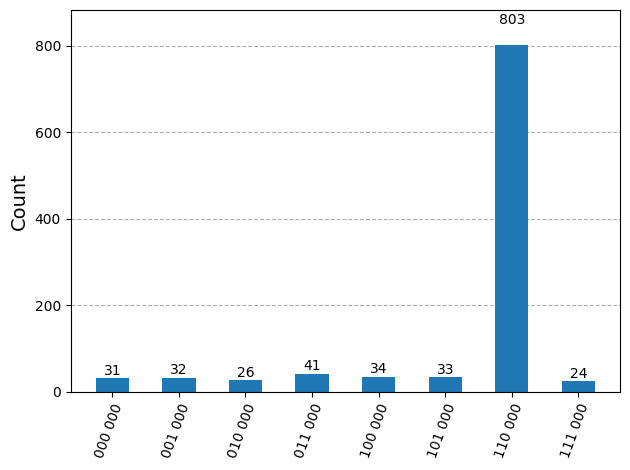

In [33]:
print(counts)
qv.plot_histogram(counts)

In [34]:
from ibmq import IBMQClient

ibm_client = IBMQClient()

In [35]:
res = ibm_client.execute(qc, 1024)

Least busy backend: ibm_brisbane
Job ID is d0h494mcrrag008bzheg


In [45]:
counts = res[0].data.meas.get_counts()

In [46]:
print(counts)

{'100': 53, '110': 578, '000': 35, '011': 83, '111': 76, '010': 120, '101': 52, '001': 27}


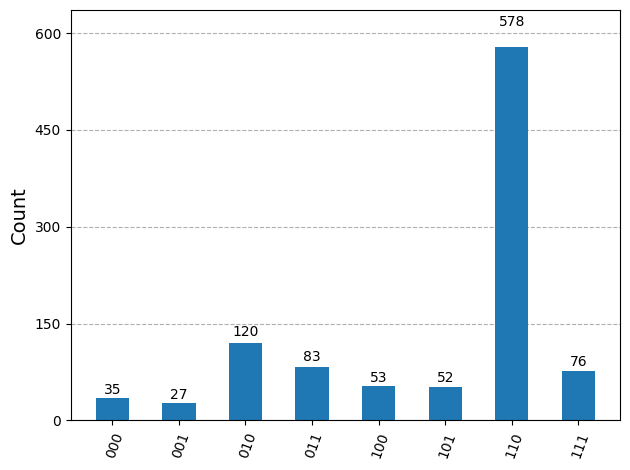

In [47]:
qv.plot_histogram(counts)